In [2]:
import os
os.chdir('../')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

from cids.util import misc_funcs as misc

In [4]:
# base_path = os.path.join(misc.root(), "results/debugging/20250108-110000/")
# base_path = os.path.join(misc.root(), "results/debugging/host/20250113-090700")
base_path = os.path.join(misc.root(), "results/autoencoder/mlp/baseline/cids")
# load scores from first trial
train_scores = np.load(os.path.join(base_path, "scores_eval/benign_train.npy"))
eval_benign = np.load(os.path.join(base_path, "scores_eval/benign_eval.npy"))
eval_malicious = np.load(os.path.join(base_path, "scores_eval/malicious_eval.npy"))


In [5]:
print(train_scores[:10])

[0.00033212 0.01318878 0.00033212 0.00485097 0.00244058 0.00138733
 0.00032782 0.00260765 0.00775679 0.00053749]


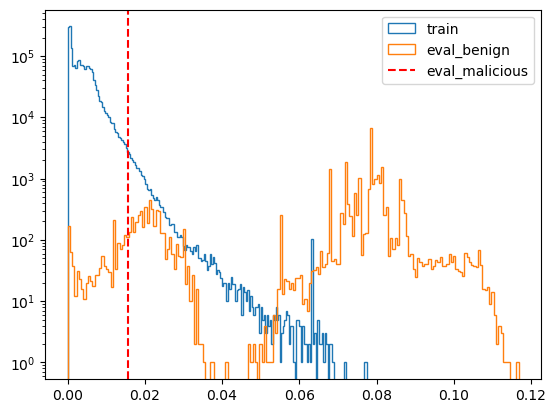

In [9]:
import json

# plt.hist(train_scores, bins=100, histtype='step', log=True)
plt.hist(eval_benign, bins=200, histtype='step', log=True)
plt.hist(eval_malicious, bins=200, histtype='step', log=True)
# Load the threshold from counts_eval.json
with open(os.path.join(base_path, "counts_eval.json"), 'r') as f:
    counts_eval = json.load(f)
threshold = counts_eval["threshold"]

# Add the threshold as a vertical red dashed line
plt.axvline(x=threshold, color='red', linestyle='--')
plt.legend(['train', 'eval_benign', 'eval_malicious'])
plt.show()

In [ ]:
y_scores = np.concatenate([eval_benign, eval_malicious])
y_true = np.concatenate([np.zeros_like(eval_benign), np.ones_like(eval_malicious)])

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)


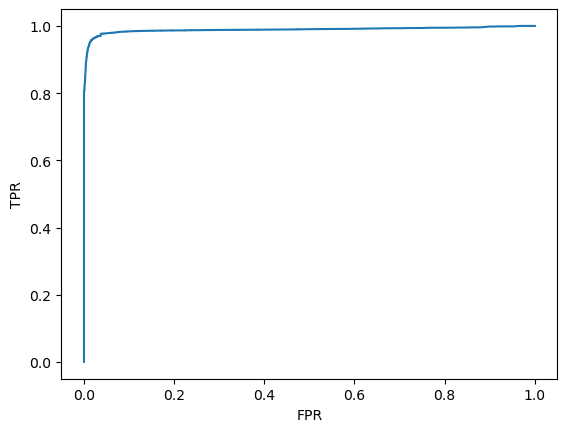

In [8]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot()
plt.show()